# Use uproot and `pandas`

In [1]:
# load root files to pandas dataframes using the uproot pacakge. 'pip install uproot' if needed.                                                                                    
import uproot, pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#for testing I like to limit the number of training events                                                                                                                          
limitNumberOfEvents = 10000

ttH = uproot.open("../Files/skimmed/ttH.root")["nominal"]
#ttH_df = ttH.pandas.df().head(limitNumberOfEvents)
ttH_df = ttH.pandas.df()

ttW = uproot.open("../Files/skimmed/ttW.root")["nominal"]
ttW_df = ttW.pandas.df()


In [3]:
ttbar = uproot.open("../Files/skimmed/ttbar.root")["nominal"]
ttbar_df = ttbar.pandas.df()

In [13]:
ttW_comp_check = uproot.open("../Files/skimmed/ttW.root")["nominal"]
ttW_comp_check_df = ttW_comp_check.pandas.df().head(limitNumberOfEvents)
del ttW_comp_check_df['weightS']


In [14]:
print( "Check headers are the same?")
A=ttH.keys()
B=ttW.keys()
np.array_equal(A,B) 


Check headers are the same?


True

In [16]:
C=ttW_comp_check_df.keys()
np.array_equal(C,B)

False

In [8]:
ttH_df.head()
#ttH_df['DEtall01'].head()

,DEtall01,lep_flavour,max_eta,minDeltaR_LJ_0,minDeltaR_LJ_1,Meff,DRlj00,min_DRl0b,min_DRlj_new,DPhij0MET,...,DRll01,nJets_OR_T,nJets_OR_T_MV2c10_70,HT_lep,HT_jets,lead_jetPt,sublead_jetPt,lepSFTrigTight,lepSFObjTight,weightS
entry,,,,,,,,,,,,,,,,,,,,,
0,1.155438,0,1.329590,0.889894,0.928825,1.219812e+06,3.609838,1.568172,1.204130,1.778188,...,2.833694,6,2,99685.375000,495748.250000,128011.968750,98597.164062,0.995519,0.943437,0.001535
1,-0.880768,1,0.463217,0.414457,0.788038,5.954846e+05,0.414457,2.340907,0.619072,2.925315,...,2.171907,5,1,73758.687500,225793.921875,68017.406250,42586.082031,0.636021,1.003987,0.001450
2,0.212666,1,0.168891,1.067585,1.043223,7.060143e+05,3.105180,1.730127,0.658229,1.766358,...,2.189412,4,1,110116.250000,236623.578125,126511.656250,47005.578125,0.960368,0.941945,0.001524
3,0.332677,2,1.323761,0.642110,0.488249,8.401949e+05,2.741835,2.741835,1.360282,2.360640,...,2.389086,5,1,56536.421875,353416.281250,138765.578125,85941.804688,0.989835,0.946505,0.001931
4,0.219985,3,1.913489,1.176604,1.057895,1.365021e+06,1.656937,1.927142,1.771835,1.254011,...,0.472404,7,1,83682.382812,543441.937500,176302.593750,157836.390625,0.993249,0.965123,0.001253


### Plot signal/background input variables

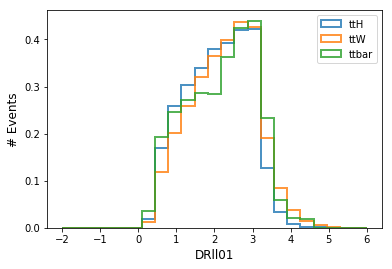

In [6]:
var='DRll01'
binning = {"DRll01": np.linspace(-2, 6, 24),
               "max_eta": np.linspace(0, 2.5, 26)}
plt.hist(ttH_df[var], binning[var], histtype='step',
         label=["ttH"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8,density=1)
plt.hist(ttW_df[var], binning[var], histtype='step',
         label=["ttW"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8,density=1)
plt.hist(ttbar_df[var], binning[var], histtype='step',
         label=["ttbar"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8,density=1)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()
plt.savefig("Plots/var.jpg", transparent=True)

# Convert root to csv

In [10]:
file_name = 'ttH.csv'
ttH_df.to_csv(file_name, sep=',')
#, sep='\t',index=False

In [11]:
file_name = 'ttW.csv'
ttW_df.to_csv(file_name, sep=',')


In [43]:
#data = np.genfromtxt("ttH.csv", delimiter=",", dtype=np.float32, max_rows=300)
data = pandas.read_csv("ttH.csv")

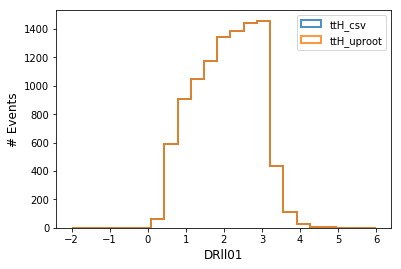

In [54]:
data['DRll01']
#data.head()
plt.hist(data[var], binning[var], histtype='step',
         label=["ttH_csv"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist(ttH_df[var], binning[var], histtype='step',
         label=["ttH_uproot"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()

In [48]:
dataA=data.to_numpy()

In [49]:
X, y = dataA[:, 1:], dataA[:, 0]

# Convert root to HDF5

In [12]:
ttW_df.to_hdf('ttW.h5', key='df', mode='w')


In [13]:
ttH_df.to_hdf('ttH.h5', key='df', mode='w')

In [5]:
ttbar_df.to_hdf('ttbar.h5', key='df', mode='w')

In [14]:
hd_ttH=pandas.read_hdf('ttH.h5', 'df')

NameError: name 'data' is not defined

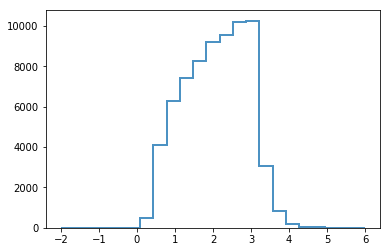

In [15]:
#hd_ttH.head()
plt.hist(hd_ttH[var], binning[var], histtype='step',
         label=["ttH_h5"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist(data[var], binning[var], histtype='step',
         label=["ttH_csv"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist(ttH_df[var], binning[var], histtype='step',
         label=["ttH_uproot"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()